`Team 16
Thuật toán LinearRegression về dự đoán giá Vàng, Bạch Kim, Bạc`

In [1]:
#1. Cài đặt thư viện
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 14})
plt.style.use("ggplot")
import numpy as np 
import pandas as pd 
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
#2. Đọc file dữ liệu và xem dữ liệu
df = pd.read_csv('../GoldData.csv',parse_dates=True)
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL
0,21/5/2018,1290.9,1290.3,1292.7,1281.2,328.02K
1,22/5/2018,1292.0,1292.3,1296.0,1287.2,291.72K
2,23/5/2018,1289.6,1290.6,1298.4,1286.7,402.34K
3,24/5/2018,1304.4,1293.3,1306.4,1292.2,432.42K
4,25/5/2018,1303.7,1304.0,1307.2,1299.4,292.91K
...,...,...,...,...,...,...
1291,15/5/2023,2018.0,2013.8,2017.1,2013.8,0.00K
1292,16/5/2023,1988.4,2021.3,2022.7,1989.1,0.05K
1293,17/5/2023,1980.7,1983.6,1983.6,1983.6,0.01K
1294,18/5/2023,1956.5,1956.8,1956.8,1956.8,0.02K


In [3]:
#3. Xem các dữ liệu cơ bản của cảc thuộc tính
df.describe()

,Lần cuối,Mở,Cao,Thấp
count,1296.000000,1296.000000,1296.000000,1296.000000
mean,1657.157253,1657.419946,1668.953858,1645.013889
std,247.037374,247.289166,250.206107,243.663453
min,1184.000000,1180.700000,1189.000000,1167.100000
25%,1467.675000,1465.800000,1473.625000,1459.100000
50%,1751.750000,1751.550000,1761.200000,1735.750000
75%,1841.325000,1840.725000,1853.300000,1828.425000
max,2069.400000,2076.400000,2089.200000,2049.000000


In [4]:
#4. Kiểm tra dữ liệu rỗng
df.isnull().sum()

Ngày        0
Lần cuối    0
Mở          0
Cao         0
Thấp        0
KL          6
dtype: int64

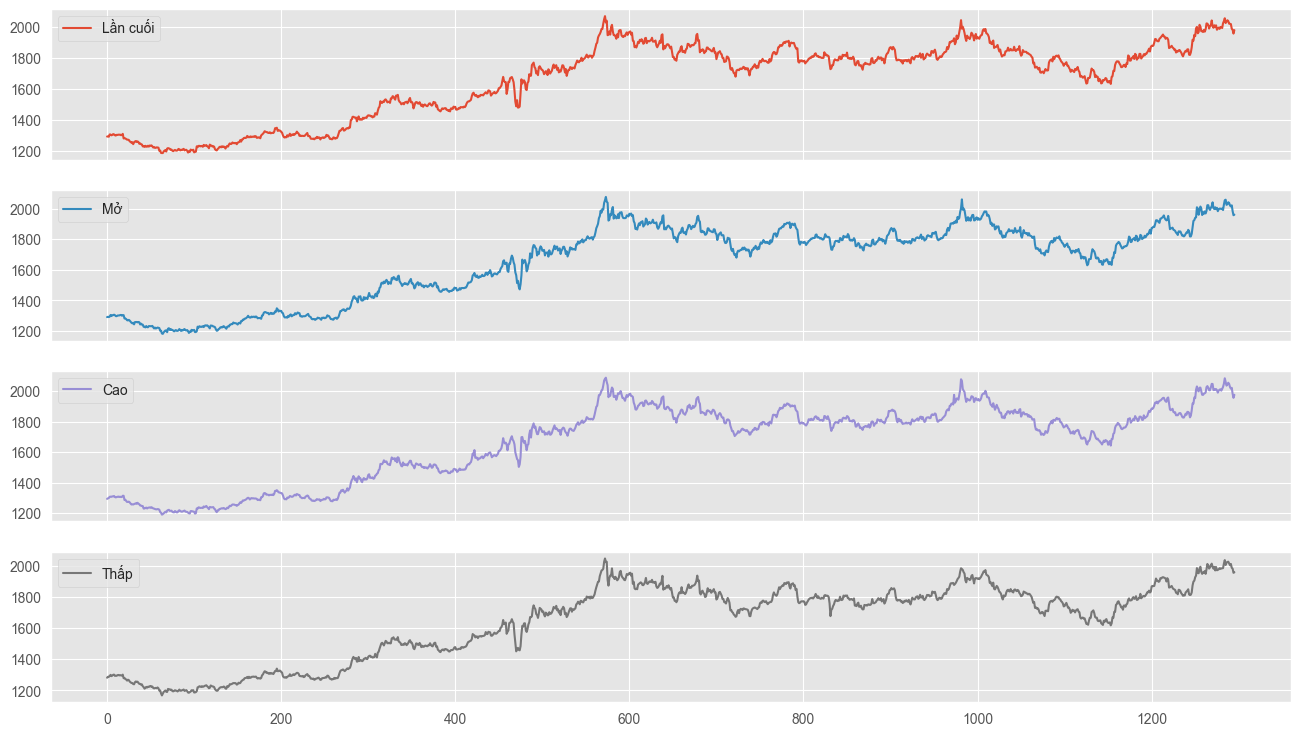

In [5]:
#5. Xem độ biến thiên của từng thuộc tính.
df.plot(legend=True,subplots=True, figsize = (16, 9))
plt.show()

In [6]:
#6. Chuyển dataset về cột Close để tiến hành tạo model
df = df[['Lần cuối']]
df

,Lần cuối
0,1290.9
1,1292.0
2,1289.6
3,1304.4
4,1303.7
...,...
1291,2018.0
1292,1988.4
1293,1980.7
1294,1956.5


In [7]:
#7. Chia dữ liệu theo các tỷ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data_df = df[:train_size]
test_data_df = df[train_size:train_size+test_size]
val_data_df = df[train_size+test_size:]


In [8]:
#8. Đánh giá 
def deviation(test, pred):
  rmse= np.sqrt(mean_squared_error(test,pred))
  print(f"RMSE: {rmse:.2f}")
  mape= mean_absolute_percentage_error(test,pred)
  print(f"MAPE: {mape*100:.2f}%")
  mae = mean_absolute_error(test, pred)
  print(f"MAE: {mae:.2f}")

In [9]:
#9. the linear regression model
model = LinearRegression()
#Hàm visualize
def visualize(label ,pred, model_name):
  plt.figure(figsize=(12,8))
  plt.plot(label, label = 'Ground truth')
  plt.plot(label.index, pred, label='Predict')
  plt.title(model_name)
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.legend()
  plt.show()

In [10]:
# 10. Quá trình Training
x_train = np.array(train_data_df.index).reshape(-1, 1)
y_train = np.array(train_data_df)
model.fit(x_train, y_train)


LinearRegression()

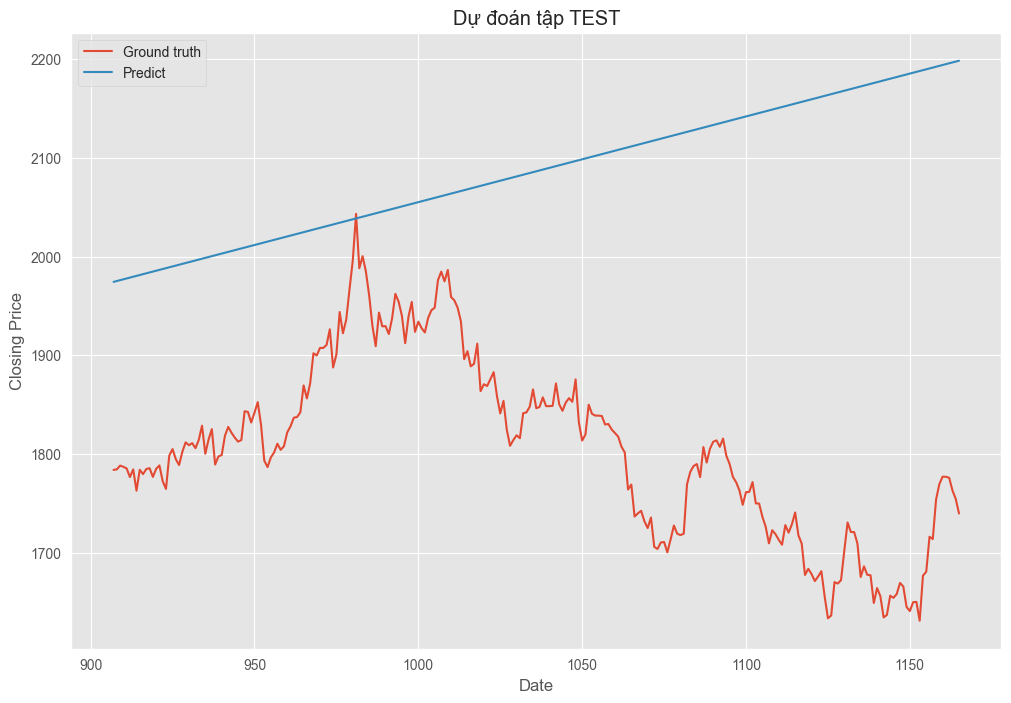

RMSE: 313.81
MAPE: 15.99%
MAE: 281.54


In [11]:
# 11. Quá trình testing 
x_test = np.array(test_data_df.index).reshape(-1, 1)
y_test = np.array(test_data_df)
test_predict = model.predict(x_test)
visualize(test_data_df, test_predict, 'Dự đoán tập TEST')
deviation(test_data_df, test_predict)

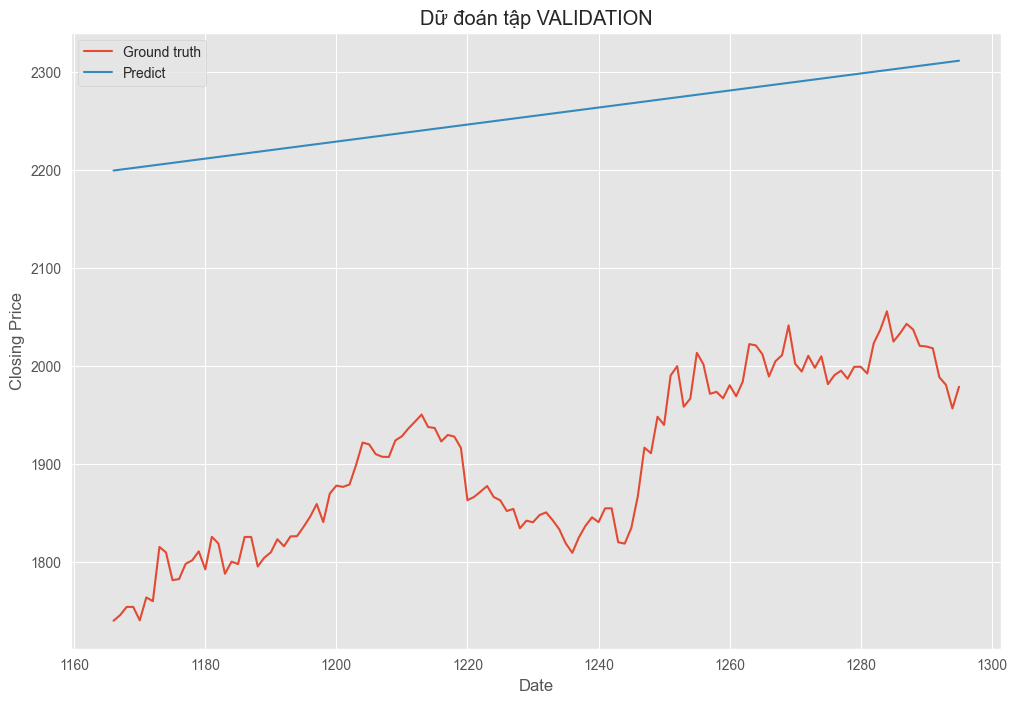

RMSE: 358.74
MAPE: 18.77%
MAE: 353.67


In [12]:
# 12. Quá trình Validate
x_val= np.array(val_data_df.index).reshape(-1, 1)
y_val = np.array(val_data_df)
val_predict =  model.predict(x_val)
visualize(val_data_df, val_predict, 'Dữ đoán tập VALIDATION')
deviation(val_data_df, val_predict)

In [13]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[[2312.31642284]
 [2313.18523598]
 [2314.05404912]
 [2314.92286226]
 [2315.7916754 ]
 [2316.66048854]
 [2317.52930168]
 [2318.39811482]
 [2319.26692796]
 [2320.1357411 ]
 [2321.00455424]
 [2321.87336738]
 [2322.74218052]
 [2323.61099366]
 [2324.4798068 ]
 [2325.34861994]
 [2326.21743308]
 [2327.08624622]
 [2327.95505936]
 [2328.82387249]
 [2329.69268563]
 [2330.56149877]
 [2331.43031191]
 [2332.29912505]
 [2333.16793819]
 [2334.03675133]
 [2334.90556447]
 [2335.77437761]
 [2336.64319075]
 [2337.51200389]]


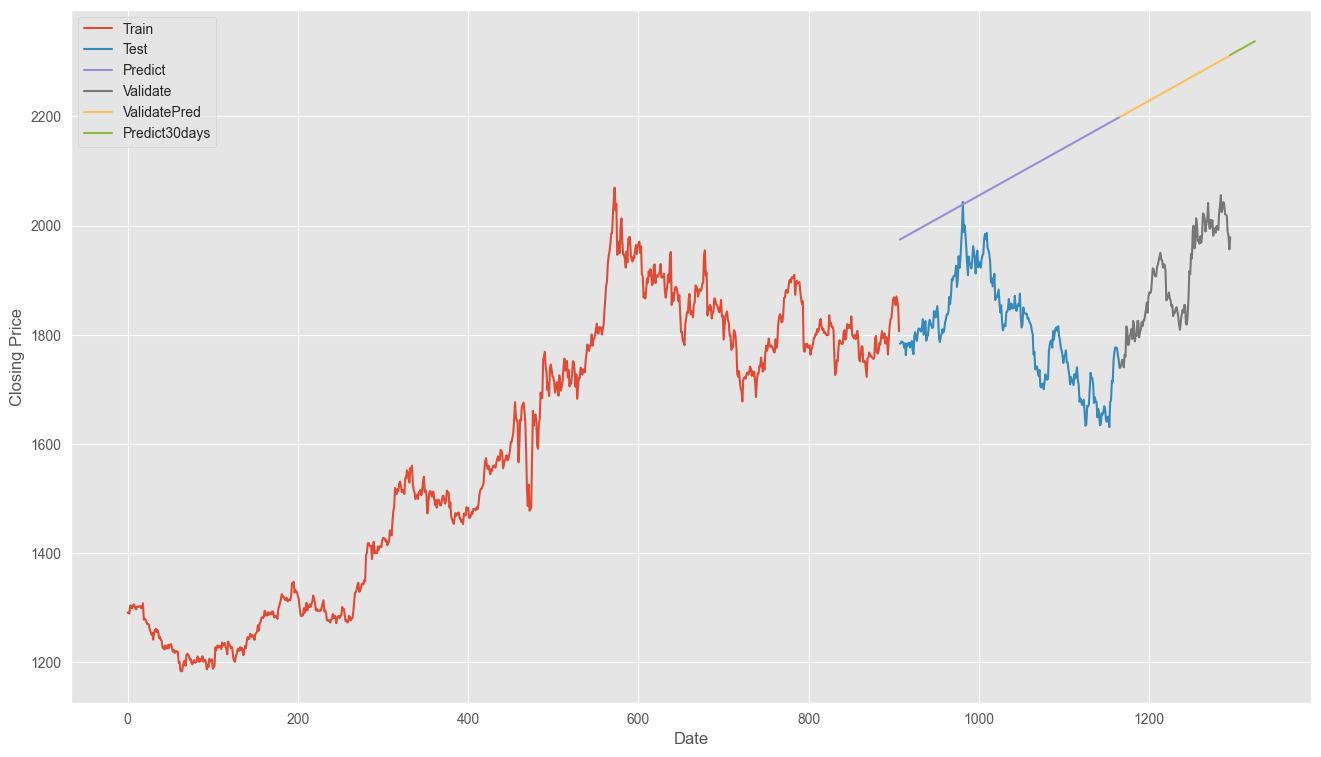

In [14]:
#Visualization
plt.figure(figsize=(16,9))
#train label
plt.plot(train_data_df, label = 'Train')

#test label and predict value
plt.plot(test_data_df, label = 'Test')
plt.plot(test_data_df.index, test_predict, label='Predict')

#val label and predict value
plt.plot(val_data_df, label = 'Validate')
plt.plot(val_data_df.index, val_predict, label='ValidatePred')

#predict next 30 days value
plt.plot(last_data,y_next_30_days, label = 'Predict30days')


# plt.title(model_name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()